when coming back for Client pres check out: 
- https://realpython.com/logistic-regression-python/

## $\color{red}{\text{Lecture Overview}}$
1. **Classification Techniques**
2. **Introduction to Logistic Regresion (LR)**
2. **Developing the Analytic Task**
3. **Data Transformation**
4. **Data Visualization**
5. **Data Modeling**
6. **Model Comparison**

## $\color{red}{\text{Logistic Regression}}$

### $\color{blue}{\text{An Intuition}}$
1. Used in situations where the dependent variable is categorical
    - If the dependent variable has two categories, it is called a **binary logistic regression**
    - If the dependent variable has more than two categories, it is called a **multinomial logistic regression**
2. The goal is to classify new observations into one of the categories of the dependent variable
3. Logistic regression also gives the probability of belonging into one of the categories

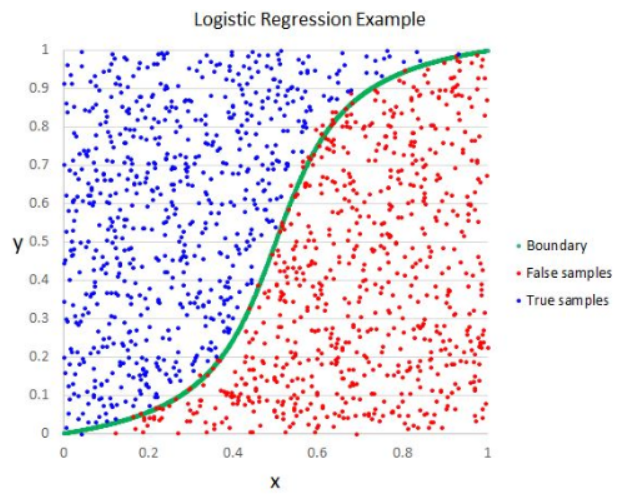

### $\color{blue}{\text{The Logit Function}}$

1. The logistic equation: $p=\frac{1}{1 + e^{-(\beta_0 + \beta_1x_1 + ... + \beta_kx_k)}}$
    - This is called the **logit/ sigmoid function**
2. Logistic regression seeks to find the parameters $\beta_0, \beta_1, ..., \beta_k$

### $\color{blue}{\text{Classifying Observations}}$

1. Compute the probability, $p$, of belonging to each class
2. Using a **threshold value, t**, determine which class each observation falls in
    - If $p > t$, that observation may be classified as "buy", "1"
    - If $p < t$, that observation may be classified as "don't buy", "0"

## $\color{red}{\text{Import Required Packages}}$

In [2]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pylab as plt

## $\color{red}{\text{Import Data}}$

In [3]:
bank_df = pd.read_csv('UniversalBank.csv')
bank_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## $\color{red}{\text{Analytic Task}}$
1. Using the bank_df data, build a **Logistic Regression model** to predict **Personal Loan**
2. Perform data transformation methods wherever needed
3. Perform data visualization tasks to develop a preliminary understanding of **Personal Loan**
4. Develop a model to predict **Personal Loan**
5. Assess the robustness of the model
6. Interpret the model for insights
7. **Model Comparison**
  - *Logistic Regression*

## $\color{red}{\text{Data Transformation}}$

### $\color{blue}{\text{Deletion and Replacing}}$
1. Identify and remove ID and other variables that does not contribute to the models
2. Fix spaces in variable names
    - If a column name has a space, replace the space with an underscore (_)
3. Check to see if the procedures worked

In [5]:
# Replace space with underscore in column names
bank_df.columns = bank_df.columns.str.replace(' ', '_')


# Delete ID and ZIP code variables
drop_vars = ['ID', 'ZIP_Code']
bank_new = bank_df.drop(drop_vars, axis=1)
bank_new.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


### $\color{blue}{\text{Recoding}}$

1. Change the **Education** variable to be type "category"
    - Some variables appear numeric but they are not
2. Rename the values (1,2,3) of the **Education** variable to the following:
    - 1 = Undergrad
    - 2 = Graduate
    - 3 = Professional
3. View the first five (5) observations of the data

In [14]:
# Change Education var to be categorical
bank_new['Education'] = bank_new['Education'].astype('category')

# Rename education valules of 1,2, and 3 to 'undergrad', 'graduate', and 'professional'
categories = {
    1:'Undergad',
    2:'Graduate',
    3:'Professional'
}

bank_new['Education'] = bank_new.Education.cat.rename_categories(categories) # returns a Series to overwrite Education column with
bank_new.head()


,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,4,1.6,Undergad,0,0,1,0,0,0
1,45,19,34,3,1.5,Undergad,0,0,1,0,0,0
2,39,15,11,1,1.0,Undergad,0,0,0,0,0,0
3,35,9,100,1,2.7,Graduate,0,0,0,0,0,0
4,35,8,45,4,1.0,Graduate,0,0,0,0,0,1


### $\color{blue}{\text{Missing Value Analysis}}$

1. Check the extent to which variables have missing observations
2. If variables are missing, then imputation should be performed

In [16]:
def show_missing_vals(df:pd.DataFrame)->pd.DataFrame:
	"""
	Returns a sorted dataframe with variable names and percentage of missing values
	"""
	return df.isna().sum().divide(len(df)).sort_values(ascending=False)


show_missing_vals(bank_new)

Age                   0.0
Experience            0.0
Income                0.0
Family                0.0
CCAvg                 0.0
Education             0.0
Mortgage              0.0
Personal_Loan         0.0
Securities_Account    0.0
CD_Account            0.0
Online                0.0
CreditCard            0.0
dtype: float64

### $\color{blue}{\text{Dummy Variables}}$
1. Create dummy variables for ALL categorical data

In [22]:
# Variable names for categorical data
cat_vars = bank_new.select_dtypes(exclude=np.number).columns.tolist() 
# cat_vars # --> ['Education']

# Create dummy variables
bank_dummy = pd.get_dummies(bank_new, columns=cat_vars, drop_first=True, dtype=int)
bank_dummy.head()


,Age,Experience,Income,Family,CCAvg,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Education_Graduate,Education_Professional
0,25,1,49,4,1.6,0,0,1,0,0,0,0,0
1,45,19,34,3,1.5,0,0,1,0,0,0,0,0
2,39,15,11,1,1.0,0,0,0,0,0,0,0,0
3,35,9,100,1,2.7,0,0,0,0,0,0,1,0
4,35,8,45,4,1.0,0,0,0,0,0,1,1,0


### $\color{blue}{\text{Data Partitioning}}$

1. Identify dependent and independent variables
2. Partition the data such that 80% is used for training and 20% is used for testing

In [27]:
from sklearn.model_selection import train_test_split

# Indep and dependent variables used in the models
dep_var = bank_dummy['Personal_Loan']
indep_var = bank_dummy.drop('Personal_Loan', axis=1)

# Partition data into training (80%) and testing (20%)
train_X, test_X, train_y, test_y = train_test_split(indep_var, dep_var, test_size=0.2, random_state=2)

## $\color{red}{\text{Data Modeling}}$

### $\color{blue}{\text{Logistic Regression}}$

1. Fit a logistic regression model on the **training data**
2. Print the **intercept** and model **coefficients**


In [30]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

# Add a column of ones (similar to the sm.add_constant in Linear Regression)
# Need this column for the 'experimental matrix' and matrix multiplication behind the scenes
train_X = sm.add_constant(train_X)

# Fit a logististic regression model
logit = sm.Logit(train_y, train_X).fit()

# Get model output
print(logit.summary())


Optimization terminated successfully.
         Current function value: 0.114148
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 4000
Model:                          Logit   Df Residuals:                     3987
Method:                           MLE   Df Model:                           12
Date:                Tue, 08 Apr 2025   Pseudo R-squ.:                  0.6422
Time:                        14:24:25   Log-Likelihood:                -456.59
converged:                       True   LL-Null:                       -1276.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -14.1912      2.060     -6.888      0.000     -18.229     -

### $\color{blue}{\text{Model Predictions}}$

1. Using the **testing data**, predict whether an individual will be approved for a **Personal_Loan**
  - This is prediction on unseen data

In [36]:
# Insert column of ones in testing data
test_X = sm.add_constant(test_X)

# Get probabilities predicted by the logistic regression 
logit_prob = logit.predict(test_X)
# type(logit_prob) # --> Series


# Set threshold for the logit function
threshold = 0.5

# Convert probabilities to categories
logit_class = (logit_prob > threshold).astype(int)
logit_class

3566    0
4252    0
1918    1
4111    0
1471    0
       ..
2987    0
3564    0
1447    0
742     0
4121    0
Length: 1000, dtype: int32

## $\color{red}{\text{Model Diagnostics on Testing Data}}$

### $\color{blue}{\text{Accuracy and Misclassification Rate}}$
1. Provide the model's accuracy rate - what does it tell you?
2. Provide the model's misclassification rate - what does it tell you?

In [38]:
from sklearn.metrics import accuracy_score

# Get accuracy rate for logistic regression
logit_acc = accuracy_score(test_y, logit_class)
print('*'*10  + ' ACCURACY RATES '+ '*'*10)
print(f'Logistic Regression: {logit_acc}')

********** ACCURACY RATES **********
Logistic Regression: 0.958


### $\color{blue}{\text{ROC Curve}}$
1. Provide the ROC curve and comment on it

*he forgot the code for this*